# Project 2- Meterology Instrument 

In [241]:
import json
import requests
import pandas as pd
import datetime
import pytz
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters

# Data OSSM(Oregon Shelf Sruface Mooring) &...................                                        .........OOSM (Oregon Offshore Surface Mooring)

In [242]:

USERNAME ='OOIAPI-OFE8MCFYP2K2SU'
TOKEN= 'YOS4LPN79YC'


In [243]:

data_request_url = ['https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE02SHSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-04-03T00:00:00.000Z&endDT=2019-04-03T00:00:00.000Z&limit=1000',
                   'https://ooinet.oceanobservatories.org/api/m2m/12576/sensor/inv/CE04OSSM/SBD11/06-METBKA000/telemetered/metbk_a_dcl_instrument?beginDT=2018-04-03T18:35:53.000Z&endDT=2019-04-03T18:35:53.000Z&limit=1000']
                   

In [244]:
# Storing values for velocity, precipitation and time
OSSM_time = []
OSSM_velocity = []
OSSM_precipitation = []

OOSM_time = []
OOSM_velocity = []
OOSM_precipitation = []

In [245]:
# UTC time to Pacific time convertion

ntp_epoch = datetime.datetime(1900, 1, 1)
unix_epoch = datetime.datetime(1970, 1, 1)
ntp_delta = (unix_epoch - ntp_epoch).total_seconds()
pst_delta = 8*3600

def ntp_seconds_to_datetime(ntp_seconds):
    timestamp = datetime.datetime.utcfromtimestamp(ntp_seconds - ntp_delta).replace(microsecond=0)
    utc_timezone = pytz.timezone('UTC')
    pst_timezone = pytz.timezone('US/Pacific')
    time = utc_timezone.localize(timestamp).astimezone(pst_timezone)
    return time


In [246]:
def Average(time,velocity,precipitation):
    
    May_velocity = []
    June_velocity = []
    July_velocity = []
    Aug_velocity = []
    Sept_velocity = []
    Oct_velocity = []
    Nov_velocity = []
    Dec_velocity = []
    Jan_velocity = []
    Feb_velocity = []
    March_velocity = []
    April_velocity = []

    April_precipitation = []
    May_precipitation = []
    June_precipitation = []
    July_precipitation = []
    Aug_precipitation = []
    Sept_precipitation = []
    Oct_precipitation = []
    Nov_precipitation = []
    Dec_precipitation = []
    Jan_precipitation = []
    Feb_precipitation = []
    March_precipitation = []
    
    
    avg_velocity = []
    avg_precipitation = []
    Months = ['May',
              'June',
              'July',
              'August',
              'September',
              'October',
              'November',
              'December',
              'January',
              'February',
              'March',
              'April',]

    for i in range(len(time)):
        if i <= int(round(len(time)/12)):
            April_velocity.append(velocity[i])
            April_precipitation.append(precipitation[i])
        elif i > int(round(len(time)/12)) and i <= 2*int(round(len(time)/12)):
            May_velocity.append(velocity[i])
            May_precipitation.append(precipitation[i])
        elif i > 2*int(round(len(time)/12)) and i <= 3*int(round(len(time)/12)):
            June_velocity.append(velocity[i])
            June_precipitation.append(precipitation[i])
        elif i > 3*int(round(len(time)/12)) and i <= 4*int(round(len(time)/12)):
            July_velocity.append(velocity[i])
            July_precipitation.append(precipitation[i])
        elif i > 4*int(round(len(time)/12)) and i <= 5*int(round(len(time)/12)):
            Aug_velocity.append(velocity[i])
            Aug_precipitation.append(precipitation[i])
        elif i > 5*int(round(len(time)/12)) and i <= 6*int(round(len(time)/12)):
            Sept_velocity.append(velocity[i])
            Sept_precipitation.append(precipitation[i])
        elif i > 6*int(round(len(time)/12)) and i <= 7*int(round(len(time)/12)):
            Oct_velocity.append(velocity[i])
            Oct_precipitation.append(precipitation[i])
        elif i > 7*int(round(len(time)/12)) and i <= 8*int(round(len(time)/12)):
            Nov_velocity.append(velocity[i])
            Nov_precipitation.append(precipitation[i])
        elif i > 8*int(round(len(time)/12)) and i <= 9*int(round(len(time)/12)):
            Dec_velocity.append(velocity[i])
            Dec_precipitation.append(precipitation[i])
        elif i > 9*int(round(len(time)/12)) and i <= 10*int(round(len(time)/12)):
            Jan_velocity.append(velocity[i])
            Jan_precipitation.append(precipitation[i])
        elif i > 10*int(round(len(time)/12)) and i <= 11*int(round(len(time)/12)):
            Feb_velocity.append(velocity[i])
            Feb_precipitation.append(precipitation[i])
        elif i > 11*int(round(len(time)/12)):
            March_velocity.append(velocity[i])
            March_precipitation.append(precipitation[i])

    avg_velocity.append(np.mean(April_velocity))
    avg_velocity.append(np.mean(May_velocity))
    avg_velocity.append(np.mean(June_velocity))
    avg_velocity.append(np.mean(July_velocity))
    avg_velocity.append(np.mean(Aug_velocity))
    avg_velocity.append(np.mean(Sept_velocity))
    avg_velocity.append(np.mean(Oct_velocity))
    avg_velocity.append(np.mean(Nov_velocity))
    avg_velocity.append(np.mean(Dec_velocity))
    avg_velocity.append(np.mean(Jan_velocity))
    avg_velocity.append(np.mean(Feb_velocity))
    avg_velocity.append(np.mean(March_velocity))
   
    avg_precipitation.append(np.mean(April_precipitation))
    avg_precipitation.append(np.mean(May_precipitation))
    avg_precipitation.append(np.mean(June_precipitation))
    avg_precipitation.append(np.mean(July_precipitation))
    avg_precipitation.append(np.mean(Aug_precipitation))
    avg_precipitation.append(np.mean(Sept_precipitation))
    avg_precipitation.append(np.mean(Oct_precipitation))
    avg_precipitation.append(np.mean(Nov_precipitation))
    avg_precipitation.append(np.mean(Dec_precipitation))
    avg_precipitation.append(np.mean(Jan_precipitation))
    avg_precipitation.append(np.mean(Feb_precipitation))
    avg_precipitation.append(np.mean(March_precipitation))
     
    
    return Months,avg_velocity,avg_precipitation

Oregon Shelf Surface Mooring - Surface Buoy


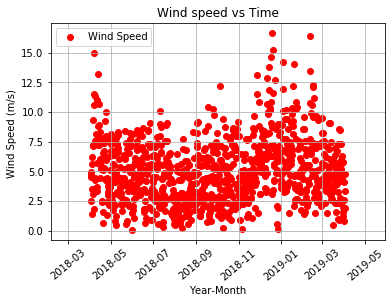

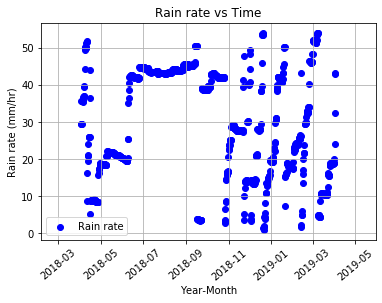

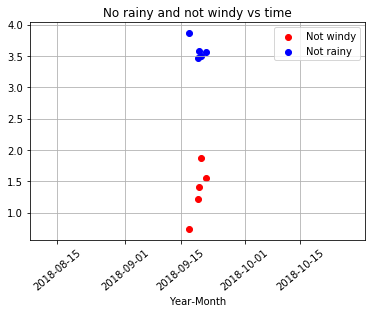

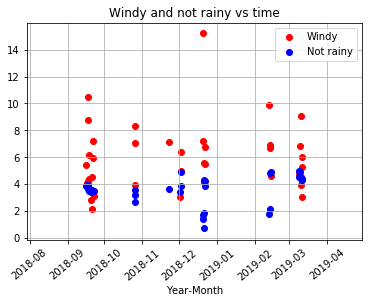

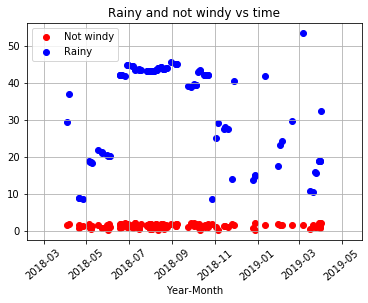

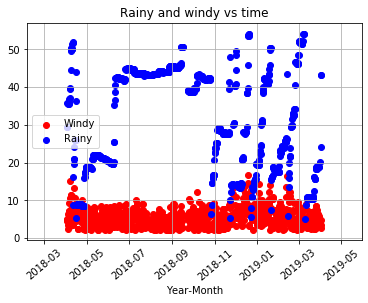

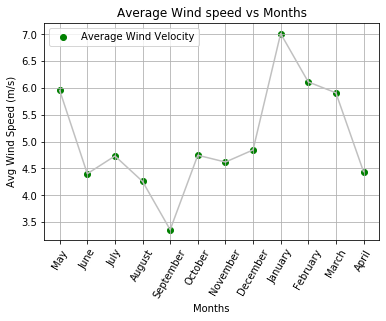

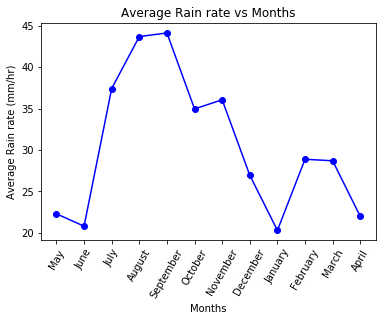

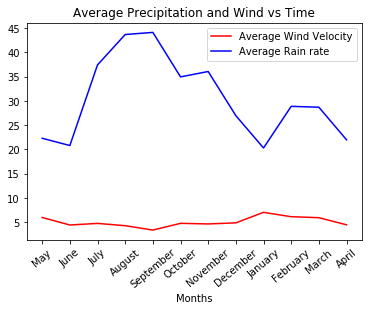

Oregon Offshore Surface Mooring - Surface Buoy


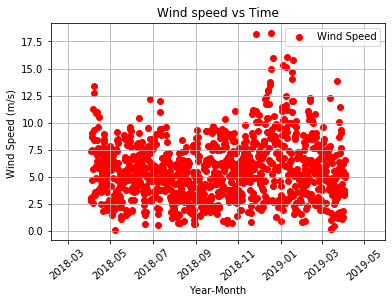

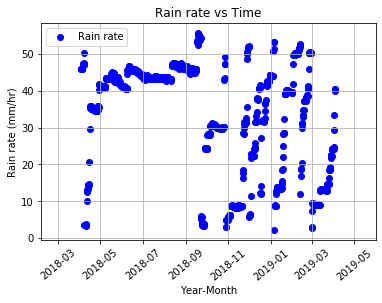

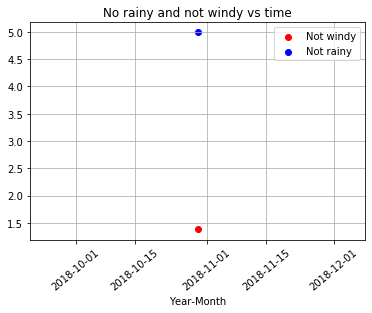

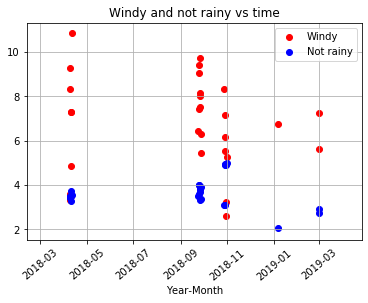

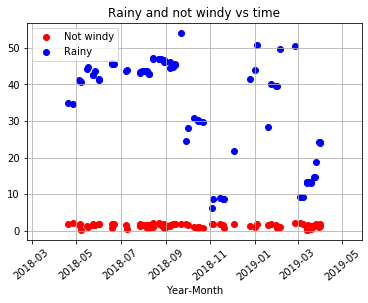

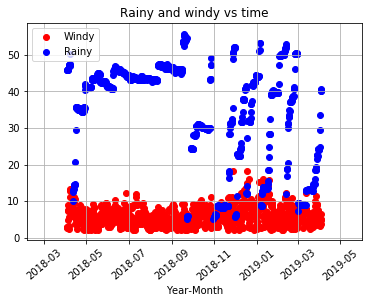

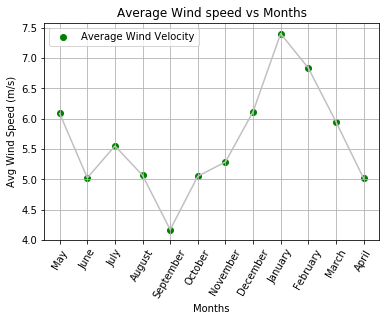

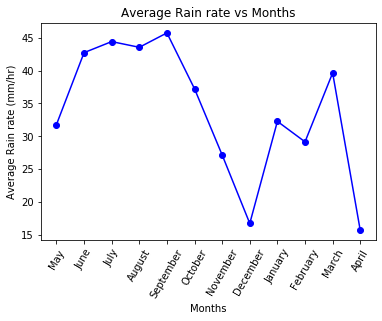

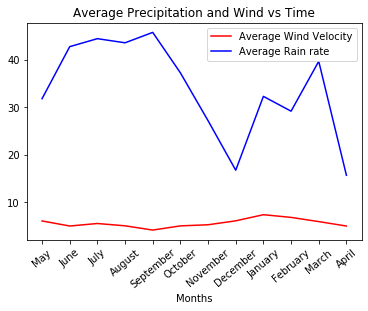

In [252]:
for i in range(len(data_request_url)):
    data_request = requests.get(data_request_url[i], auth=(USERNAME, TOKEN))
    data = data_request.json()
    time = []
    velocity = []
    precipitation = []
    if i == 0:
        print("Oregon Shelf Surface Mooring - Surface Buoy")
    elif i==1:
        print("Oregon Offshore Surface Mooring - Surface Buoy")
    
    for j in range(len(data)):
        time.append(ntp_seconds_to_datetime(data[j]['time']))
        
         #resultant velocity
        resultant_velocity = np.sqrt((np.square(data[j]['northward_wind_velocity']))+(np.square(data[j]['eastward_wind_velocity'])))
        velocity.append(resultant_velocity)
        precipitation.append(data[j]['precipitation'])
        if i == 0:
            OSSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OSSM_velocity.append(resultant_velocity)
            OSSM_precipitation.append(data[j]['precipitation'])
          
        elif i == 1:
            OOSM_time.append(ntp_seconds_to_datetime(data[j]['time']))
            OOSM_velocity.append(resultant_velocity)
            OOSM_precipitation.append(data[j]['precipitation'])
            
    
    from numpy import *
    velocity = np.asarray(velocity)
    velocity[isnan(velocity)] = 0
    
    #Case 1: No rainy and not windy
    time1 = []
    velocity1 = []
    precipitation1 = []
     
    #Case 2: Windy and not rainy
    time2 = []
    velocity2 = []
    precipitation2 = []
    
    #Case 3: Rainy and not windy
    time3 = []
    velocity3 = []
    precipitation3 = []
    
    #Case 4: Rainy and Windy
    time4 = []
    velocity4 = []
    precipitation4 = []
    
    for i in range(len(time)):
        if velocity[i] < 2 and precipitation[i] < 5:
            #Case 1: No rainy and not windy
            time1.append(time[i])
            velocity1.append(velocity[i])
            precipitation1.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] < 5:
            #Case 2: Windy and not rainy
            time2.append(time[i])
            velocity2.append(velocity[i])
            precipitation2.append(precipitation[i])
        elif velocity[i] < 2 and precipitation[i] >= 5:
            #Case 3: Rainy and not windy
            time3.append(time[i])
            velocity3.append(velocity[i])
            precipitation3.append(precipitation[i])
        elif velocity[i] >= 2 and precipitation[i] >= 5:
            #Case 4: Rainy and Windy
            time4.append(time[i])
            velocity4.append(velocity[i])
            precipitation4.append(precipitation[i])
            
    # wind speed vs time
    plt.scatter(time,velocity, color= 'Red',label = 'Wind Speed')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.ylabel('Wind Speed (m/s) ')
    plt.title('Wind speed vs Time')
    plt.grid(True)
    plt.show()
    
    # rain rate vs time
    plt.scatter(time,precipitation, color='blue',label = 'Rain rate')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.ylabel('Rain rate (mm/hr)')
    plt.title('Rain rate vs Time')
    plt.grid(True)
    plt.show()
    
    
    # not windy not rainy vs time
    plt.scatter(time1,velocity1,color = 'Red',label = 'Not windy')
    plt.scatter(time1,precipitation1,color = 'blue',label='Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('No rainy and not windy vs time')
    plt.grid(True)
    plt.show()
   
    
    # not rainy and windy vs time
    plt.scatter(time2,velocity2,color = 'Red',label='Windy')
    plt.scatter(time2,precipitation2,color = 'blue',label = 'Not rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Windy and not rainy vs time')
    plt.grid(True)
    plt.show()
    
    # Rainy and not windy vs time
    plt.scatter(time3,velocity3,color = 'Red',label='Not windy')
    plt.scatter(time3,precipitation3,color = 'blue',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rainy and not windy vs time')
    plt.grid(True)
    plt.show()
    
    # rainy and windy vs time
    plt.scatter(time4,velocity4,color = 'Red', label='Windy')
    plt.scatter(time4,precipitation4,color = 'blue',label = 'Rainy')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Year-Month')
    plt.title('Rainy and windy vs time')
    plt.grid(True)
    plt.show()
    
    
    #   ------------  The monthly average of the wind speed and rain ratefor each site ----------------
    
    #calling a Average function
    avg = Average(time,velocity,precipitation)
    
    #divide by the average to normalize
    mean_vel=np.mean(velocity)
    mean_precipitate=np.mean(precipitation)
    # From return
    # 0=Months
    # 1= Wind Velocity
    # 2= Rain rate
    plt.scatter(avg[0],avg[1],color='green',label = 'Average Wind Velocity')
    plt.plot(avg[0],avg[1],color='Silver')
    plt.legend()
    plt.xticks(rotation=60)
    plt.xlabel('Months')
    plt.ylabel('Avg Wind Speed (m/s)')
    plt.title('Average Wind speed vs Months')
    plt.grid(True)
    plt.show()
    
    plt.scatter(avg[0],avg[2],color='blue',label = 'Average Rain rate')
    plt.plot(avg[0],avg[2],color='blue')
    plt.xticks(rotation=60)
    plt.xlabel('Months')
    plt.ylabel('Average Rain rate (mm/hr)')
    plt.title('Average Rain rate vs Months')
    plt.show()
    
    plt.plot(avg[0],avg[1],color='Red',label = 'Average Wind Velocity')
    plt.plot(avg[0],avg[2],color='blue',label = 'Average Rain rate')
    plt.legend()
    plt.xticks(rotation=40)
    plt.xlabel('Months')
    plt.ylabel
    plt.title('Average Precipitation and Wind vs Time')
    plt.show()

max correlation is 0.7275622972414707 at lag 2
Lag in Days: 0
The x-axis with 2001 points corresponds to all of the index values in the cross-correlation set


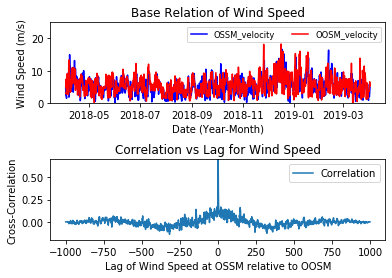

In [235]:
OSSM_velocity = np.asarray(OSSM_velocity)
OSSM_velocity[isnan(OSSM_velocity)] = 0

OOSM_velocity = np.asarray(OOSM_velocity)
OOSM_velocity[isnan(OOSM_velocity)] = 0

y1 = OSSM_velocity
y2 = OOSM_velocity

x = OSSM_time

lags = np.arange(-len(y1)+1 , len(y1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=3)

ax = axs[0]
ax.plot(x, y1, 'b', label='OSSM_velocity')
ax.plot(x, y2, 'r', label='OOSM_velocity')
ax.set_ylim(0, 25)
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('Base Relation of Wind Speed')
ax.set_ylabel('Wind Speed (m/s)')
ax.set_xlabel('Date (Year-Month)')


ax = axs[1]
ax.plot(lags, ccor, label='Correlation')
ax.legend()
ax.set_ylim(-.2, .7)
ax.set_ylabel('Cross-Correlation')
ax.set_xlabel('Lag of Wind Speed at OSSM relative to OOSM')
ax.set_title('Correlation vs Lag for Wind Speed')

plt.subplots_adjust(hspace=.7)
maxccor = np.max(ccor)
maxlag = lags[np.argmax(ccor)]
print("max correlation is",str(maxccor),"at lag",maxlag)

days = (maxlag/len(time))*365
print('Lag in Days: %d' % days)

maxccor = np.max(ccor)

z=len(lags)
print('The x-axis with %d points corresponds to all of the index values in the cross-correlation set'  % z)

max correlation is 0.35713238870988756 lag at 56
Lag in Days is 20.0 days
The x-axis with %d points corresponds to all of the index values in the cross-correlation set 2001


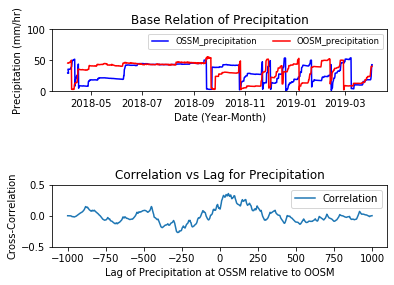

In [236]:
y1 = np.asarray(OSSM_precipitation)
y2 = np.asarray(OOSM_precipitation)

x = OSSM_time

lags = np.arange(-len(y1) + 1, len(y1))
ccov = np.correlate(y1 - y1.mean(), y2 - y2.mean(), mode='full')
ccor = ccov / (len(y1) * y1.std() * y2.std())

fig, axs = plt.subplots(nrows=2)
fig.subplots_adjust(hspace=1.5)
ax = axs[0]
ax.plot(x, y1, 'b', label='OSSM_precipitation')
ax.plot(x, y2, 'r', label='OOSM_precipitation')
ax.set_ylim(0, 100)
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax.set_title('Base Relation of Precipitation')
ax.set_ylabel('Precipitation (mm/hr)')
ax.set_xlabel('Date (Year-Month)')

ax = axs[1]
ax.plot(lags, ccor, label='Correlation')
ax.legend()
ax.set_ylim(-.5, .5)
ax.set_ylabel('Cross-Correlation')
ax.set_xlabel('Lag of Precipitation at OSSM relative to OOSM')
ax.set_title('Correlation vs Lag for Precipitation')

plt.subplots_adjust(hspace=1.5)

maxlag = lags[np.argmax(ccor)]
maxccor = np.max(ccor)
print("max correlation is", str(maxccor),"lag at", maxlag)

days = (maxlag/len(time))*365
print("Lag in Days is",round(days), "days")

z=len(lags)
print("The x-axis with %d points corresponds to all of the index values in the cross-correlation set", z)
